In [136]:
pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime


In [46]:
def split(l):
    


    l_train=l[:-10]
    l_test=l[-10:]
    return l_train,l_test

def predict_plot(orient_train,orient_test,flag):
    

    ARIMAmodel = ARIMA(orient_train, order=(4, 2, 0))
    ARIMAmodel = ARIMAmodel.fit()


    next_values = ARIMAmodel.forecast(steps=10)

    
    mse=0
    
    for i in range(0,len(next_values)):
        mse=mse+((next_values[i]-orient_test[i])**2)
    
    print("The MSE IS : ",mse)
    plt.plot(next_values,label="Predicted")
    plt.plot(orient_test,label="Actual")
    plt.legend()

    if(flag==0):
        plt.title("Fastest")
    elif(flag==1):
        plt.title("Game")
    elif(flag==2):
        plt.title("Normal")
    elif(flag==3):
        plt.title("UI")
    plt.show()


def get_preds(file,flag):
    

    df=pd.read_csv(file)
    df['time'] = pd.to_datetime(df['time'],unit='ms')

    df.set_index('time', inplace=True)

    df = df.resample('1S').mean().interpolate()

    x_list=np.array(df["x_coor"])
    y_list=np.array(df["y_coor"])
    z_list=np.array(df["z_coor"])

    

    x_train,x_test=split(x_list)
    y_train,y_test=split(y_list)


    z_train,z_test=split(z_list)

    

    predict_plot(x_train,x_test,flag)
    predict_plot(y_train,y_test,flag) 
    predict_plot(z_train,z_test,flag)

The MSE IS :  1.8624480922706343


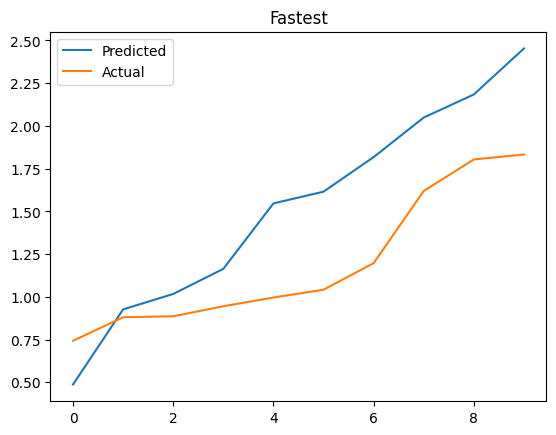

The MSE IS :  116.18402788513589


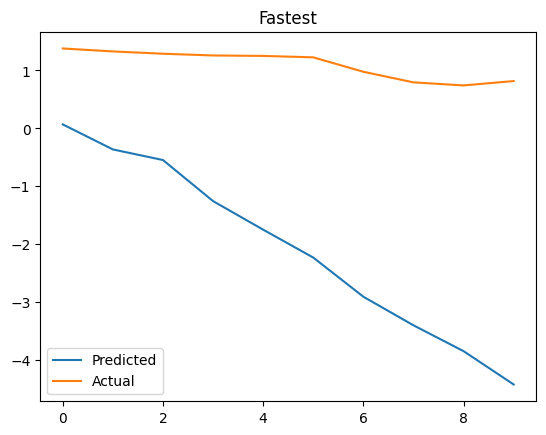

The MSE IS :  8.785259291929378


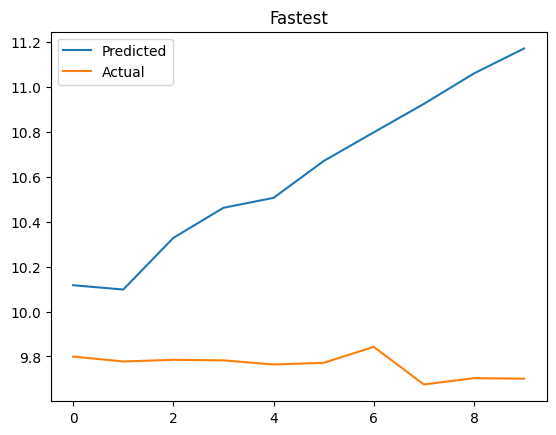

In [47]:
get_preds("database-rot_entity_F1.csv",0)

The MSE IS :  2.3053657652845763


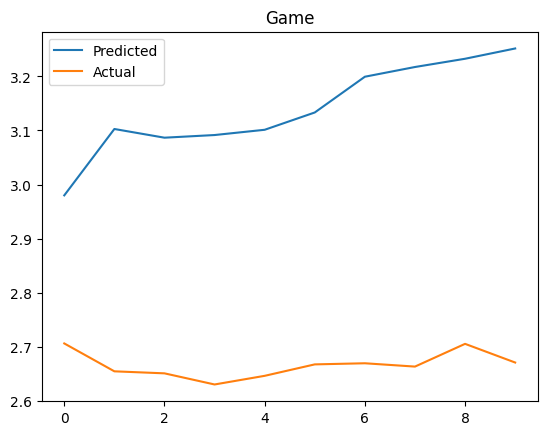

The MSE IS :  5.271979736760008


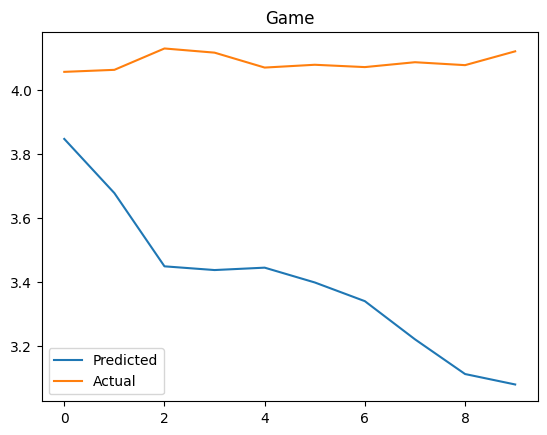

The MSE IS :  1.606592841957672


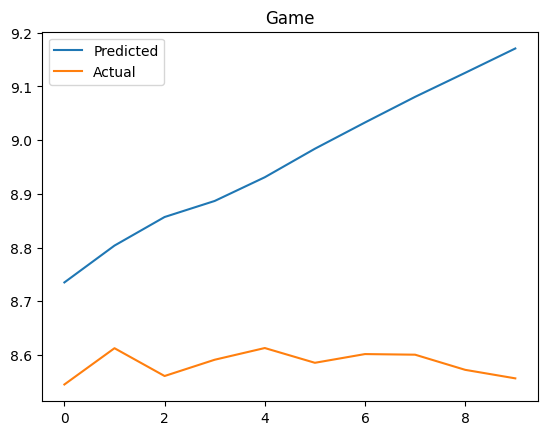

In [48]:
get_preds("database-rot_entity_G1.csv",1)

The MSE IS :  13.141810312128525


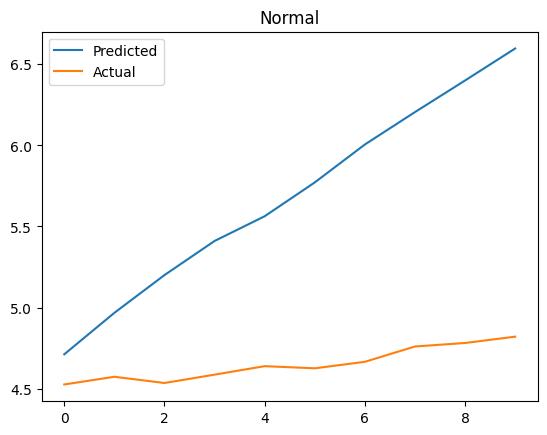

The MSE IS :  3.199498149513868


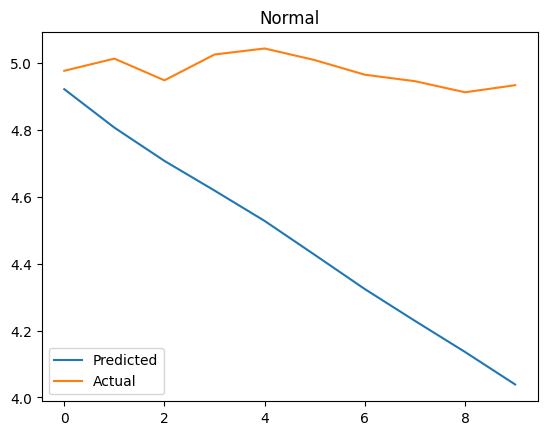

The MSE IS :  0.318801219705035


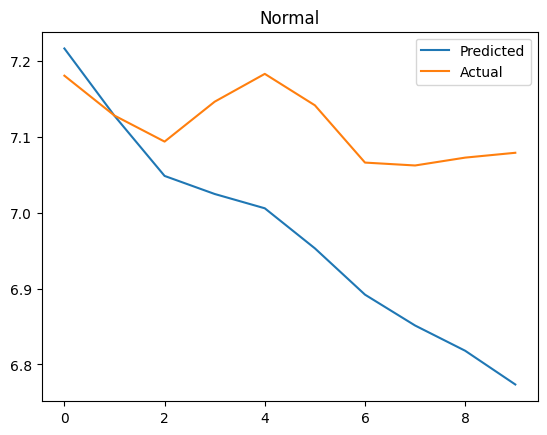

In [49]:
get_preds("database-rot_entity_N1.csv",2)

The MSE IS :  0.0005025542289714678


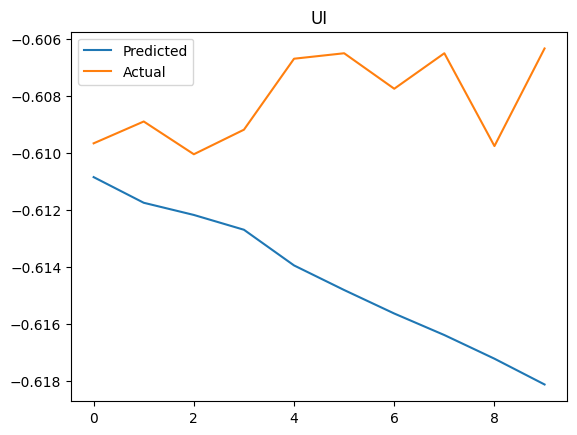

The MSE IS :  2.3216214435009723e-05


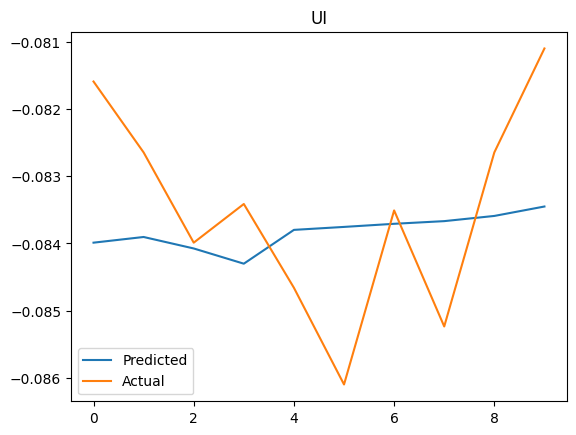

The MSE IS :  6.698257785008479e-05


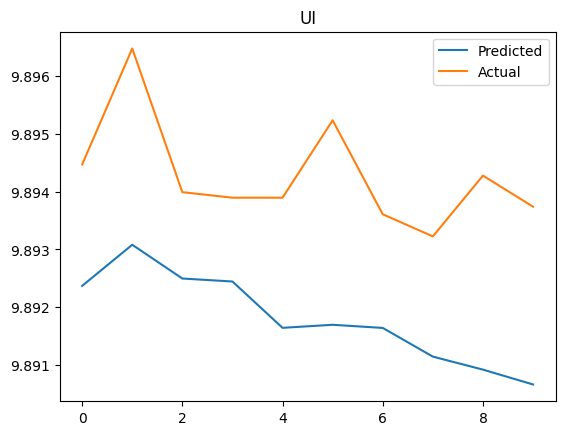

In [50]:
get_preds("database-rot_entity_UI1.csv",3)